![DSL_logo](https://github.com/BrockDSL/Python_2.0_Workshop/blob/master/dsl_logo.png?raw=1)


# Data Science with Python!

Welcome to the Digital Scholarship Lab Level 2 Python workshop. Before proceeding please make sure you've completed [part 1](https://brockdsl.github.io/Intro_to_Python_Workshop/) 

Which covers:
- variables
- math
- conditional
- loops
- functions


What we'll learn today is:
- importing libraries
- analyzing data with pandas
- plotting data with matplotlib


We'll be using Python as a Data Analysis tool
This is how the [Kaggle](https://kaggle.com) website works



Before we get going the next cell should look totally familar to you

In [1]:
scores = [3,5,6,2,1,6]

def find_mean(scores):
    
    sum = 0
    for s in scores:
        sum = sum + s
        
    return sum/len(scores)


print(find_mean(scores))

3.8333333333333335


----

## Importing Libraries

- Our end goal is to re-use as much code as possible
- To do this we load in different Libraries using the `import` command
- For this example we want to load in the [statistics](https://docs.python.org/3/library/statistics.html) library


In [2]:
import statistics

print(statistics.mean(scores))
print(statistics.median(scores))
print(statistics.mode(scores))


3.8333333333333335
4.0
6


- Try Q1 - Q2 below and type "Got it" in the chat when you are done.

- **Q1** We can use the [math](https://docs.python.org/3/library/math.html) library to do interesting calculations, but we need to import it first. Eg. the function that performs that finds the square root of a number is called `math.sqrt()` Modify the following code to print out the square root of the variable `number`.

In [3]:
import math

number = 81


print(math.sqrt(number))

9.0


- **Q2** The `str` library is so important that it is included all the time Python runs. Try to print the contents of the variable `all_caps` to the screen in lower case letters. You can use `str.lower()` function on a string variable to do this. Modify the following code so that it prints out in lowercase. (Details on the [str](https://docs.python.org/3/library/string.html) library, if your interested)

In [ ]:
all_caps = "HELLO"
print(str.lower(all_caps))

hello



# EXERCISE: Analyzing Data

![sick](https://upload.wikimedia.org/wikipedia/commons/9/97/Caladrius2.jpg)

We'll be focusing on data analysis for the rest of this workshop so let's import some libraries: [pandas](https://pandas.pydata.org/), and [matplotlib](https://matplotlib.org)

We'll be exploring how to do analysis with a riff of a data set taken from [Kaggle](https://www.kaggle.com/carlolepelaars/toy-dataset/). It has been localized with Canadian Cities and shortened a tad. Let's view the [file](canadian_toy_dataset.csv)

---

![excel preview](https://raw.githubusercontent.com/BrockDSL/Python_2.0_Workshop/master/data_in_excel.png)

You could use Excel to do some of this analysis true, but if you have a large dataset, using Excel is going to be difficult to work with.


The data has 5 columns
- _City_ is a Canadian Cities
- _Gender_ is the self reported gender of the person
- _Age_ is a integer that represents how old the person in in the record is
- _Income_ the annual salary of the person as an integer
- _ill_ a 'Yes' or 'No' to indicate if the person is suffering from our mystery illness



We want to explore the data to see if we can pick up any insights about who is ill and who is not ill. In part 3 of this workshop we will use machine learning to see if we can make predictions with the data.


- **Q3** What types of questions might we want to ask from the data? Provides some ideas in the Zoom chat box

## Loading the Libraries

To get everything ready we need to load the following cell

In [4]:
#Load the Library Pandas, that works with data
import pandas as pd

#Load the Library Numpy, that works with numerical calculations
import numpy as np

#These two libraries are often used together!

## Loading the data

- We'll load the data into a pandas `dataframe`. ([More Info](https://realpython.com/pandas-dataframe/)) A dataframe has a lot of properties we can use.
- It is a very complex type of variable, think of the `dictionary` we looked at last time.
- This data is complete, so we don't need to worry about incomplete rows in our observations
- We'll take a look at the first 10 lines of the dataset

In [6]:
#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#Tell it what our columns are by passing along a list of that information
data.columns = ["city","gender","age","income","ill"]

#Show the first 10 lines
data.head(10)

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No
5,Montreal,Female,36,50786,No
6,Montreal,Female,32,33155,No
7,Montreal,Male,39,30914,No
8,Montreal,Male,51,68667,No
9,Montreal,Female,30,50082,No


Pandas can provide us some nice quantitative details about our data by calling the `describe()` function

In [7]:
data.describe()

,age,income
count,150000.000000,150000.000000
mean,44.950200,91252.798273
std,11.572486,24989.500948
min,25.000000,-654.000000
25%,35.000000,80867.750000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


## Grouping and  Counting

- We also need to gather the entries we need by grouping them together with the `.groupby()` function. We can chain these things together to ask very specific questions of the data.
- We pass what column we'd like to group the data by
- We add `.count()` if we are just interested int the counts and not the dataframe


How many people are `ill`?

In [ ]:
data.groupby("ill")

In [8]:
data.groupby("ill").count()

,city,gender,age,income
ill,,,,
No,137861,137861,137861,137861
Yes,12139,12139,12139,12139


Try questions Q4 & Q5 below and type "Finished!" in the chat box when you are done

- **Q4** How many people are `Male` in this dataset?

In [ ]:
data.groupby("gender").count()

,city,age,income,ill
gender,,,,
Female,66200,66200,66200,66200
Male,83800,83800,83800,83800


- **Q5** How many different cities are in the dataset?

In [ ]:
data.groupby('city').count()

,gender,age,income,ill
city,,,,
Edmonton,12292,12292,12292,12292
Halifax,8301,8301,8301,8301
Montreal,19707,19707,19707,19707
Ottawa,8120,8120,8120,8120
Regina,4881,4881,4881,4881
Toronto,50307,50307,50307,50307
Vancouver,32173,32173,32173,32173
Waterloo,14219,14219,14219,14219


In [12]:
data['city'].unique()

array(['Montreal', 'Toronto', 'Vancouver', 'Waterloo', 'Halifax',
       'Ottawa', 'Regina', 'Edmonton'], dtype=object)

## Grouping and applying functions

- If we want to do some math on the data we need to cluster it together a bit. We use `.groupby()` and then apply our mathematical functions to the result
- Here we'll use the following 3 functions:
 - `mean()` finds the arithmetic mean of the data
 - `max()` finds the largest occurence of data in that column
 - `min()` finds the smallest occurennce of data in that column


What is the average income of people in `Waterloo`?

In [10]:
data.groupby("city")["income"].mean()

city
Edmonton      90277.513423
Halifax       91554.571497
Montreal      45252.231187
Ottawa        70991.612808
Regina       100756.209178
Toronto       96857.131393
Vancouver     95264.155410
Waterloo     135078.415782
Name: income, dtype: float64

Try questions Q6-Q8 and type "All done" into the chat when you are finished"

- **Q6** What is the average age of people in each `city`?

In [ ]:
data.groupby("city")["age"].mean()

city
Edmonton     44.651237
Halifax      45.197807
Montreal     45.058761
Ottawa       44.802709
Regina       44.965171
Toronto      44.922118
Vancouver    44.994094
Waterloo     44.992756
Name: age, dtype: float64

- **Q7** What is the minimum and maximum age seen in the data

In [ ]:
data.groupby("city")["age"].min()

city
Edmonton     25
Halifax      25
Montreal     25
Ottawa       25
Regina       25
Toronto      25
Vancouver    25
Waterloo     25
Name: age, dtype: int64

In [ ]:
data.groupby("city")["age"].max()

city
Edmonton     65
Halifax      65
Montreal     65
Ottawa       65
Regina       65
Toronto      65
Vancouver    65
Waterloo     65
Name: age, dtype: int64

- **Q8** What is the maximum and minimum income seen in the data set?

In [11]:
data.groupby("city")["income"].max()

city
Edmonton     132302
Halifax      132348
Montreal      91479
Ottawa       107704
Regina       140190
Toronto      147170
Vancouver    141249
Waterloo     177157
Name: income, dtype: int64

In [ ]:
data.groupby("city")["income"].min()

city
Edmonton     50602
Halifax      48425
Montreal      -654
Ottawa       33335
Regina       64941
Toronto      55538
Vancouver    51131
Waterloo     95202
Name: income, dtype: int64

# Sorting

- We can apply sorting to our dataframe actions by using the funciton `.sort_values()`
- We need to give what column we'd like to sort it with `by =`
- We also need to tell it to display it in an increase way `ascending = False`

What city has the most `ill` people? Here we do it in two steps

In [ ]:
by_city = data.groupby("city").count()

sorted_city = by_city.sort_values(by = "ill",ascending = False)

sorted_city

,gender,age,income,ill
city,,,,
Toronto,50307,50307,50307,50307
Vancouver,32173,32173,32173,32173
Montreal,19707,19707,19707,19707
Waterloo,14219,14219,14219,14219
Edmonton,12292,12292,12292,12292
Halifax,8301,8301,8301,8301
Ottawa,8120,8120,8120,8120
Regina,4881,4881,4881,4881


We could also do it in one step:

In [ ]:
data.groupby("city").count().sort_values(by = "ill",ascending = False)

,gender,age,income,ill
city,,,,
Toronto,50307,50307,50307,50307
Vancouver,32173,32173,32173,32173
Montreal,19707,19707,19707,19707
Waterloo,14219,14219,14219,14219
Edmonton,12292,12292,12292,12292
Halifax,8301,8301,8301,8301
Ottawa,8120,8120,8120,8120
Regina,4881,4881,4881,4881


Try questions Q9 - Q10 and type "Finished" in the chat when you are done

- **Q9** What city has the highest average income?

In [14]:
data.groupby("city").mean().sort_values(by = "income", ascending = False)

,age,income
city,,
Waterloo,44.992756,135078.415782
Regina,44.965171,100756.209178
Toronto,44.922118,96857.131393
Vancouver,44.994094,95264.155410
Halifax,45.197807,91554.571497
Edmonton,44.651237,90277.513423
Ottawa,44.802709,70991.612808
Montreal,45.058761,45252.231187


Answer: 

- **Q10** What city has the oldest people?

In [15]:
data.groupby("city").mean().sort_values(by = "age", ascending = False)

,age,income
city,,
Halifax,45.197807,91554.571497
Montreal,45.058761,45252.231187
Vancouver,44.994094,95264.155410
Waterloo,44.992756,135078.415782
Regina,44.965171,100756.209178
Toronto,44.922118,96857.131393
Ottawa,44.802709,70991.612808
Edmonton,44.651237,90277.513423


Answer:

## Unique entries & values counts

- Here we use `.unique()` to only give the first instances of the item. Results are returned as a list, which is useful for us later
- This is useful for seeing how many values are in a categorical column

In [16]:
data["city"].unique()

array(['Montreal', 'Toronto', 'Vancouver', 'Waterloo', 'Halifax',
       'Ottawa', 'Regina', 'Edmonton'], dtype=object)

What are unique values for the `age` field?

In [17]:
data["age"].unique()

array([41, 54, 42, 40, 46, 36, 32, 39, 51, 30, 48, 47, 61, 43, 27, 38, 35,
       57, 33, 58, 64, 44, 34, 45, 55, 63, 59, 26, 56, 62, 31, 49, 53, 29,
       28, 25, 37, 65, 60, 50, 52])

- To get total number of unique values and frequency in the data we use `value_counts() 

In [18]:
data["city"].value_counts()

Toronto      50307
Vancouver    32173
Montreal     19707
Waterloo     14219
Edmonton     12292
Halifax       8301
Ottawa        8120
Regina        4881
Name: city, dtype: int64

## Selecting subsets of data

- To make life easier we can create dataframes that just have the values we are interested in
- This is a bit more complicated but follows this type of pattern:

```
dataframe[dataframe[search criteria]]
```

- We are basically creating a subset of the dataframe by matching all entries that match `search criteria`
- That search criteria can be anything that is a conditional
- Doing this gives you a new dataframe

EG. A new dataframe of people with an income over $100000

In [19]:
over_100k = data[data["income"] > 100000]
print(over_100k)

            city  gender  age  income ill
19707    Toronto    Male   49  112226  No
19708    Toronto    Male   42  110534  No
19709    Toronto  Female   61  100665  No
19713    Toronto    Male   38  120288  No
19716    Toronto  Female   39  105036  No
...          ...     ...  ...     ...  ..
149977  Edmonton    Male   51  107123  No
149978  Edmonton    Male   58  100949  No
149994  Edmonton  Female   37  106097  No
149997  Edmonton    Male   26  111885  No
149998  Edmonton    Male   25  111878  No

[51845 rows x 5 columns]


EG. If we want the count of people over 100k, we apply the `.count()` function to what we selected

In [20]:
over_100k.count()

city      51845
gender    51845
age       51845
income    51845
ill       51845
dtype: int64

This can be done in 1 line as well

In [21]:
data[data["income"] > 100000].count()

city      51845
gender    51845
age       51845
income    51845
ill       51845
dtype: int64

Try Q11 below and type "I got it" into the chat when you are done

- **Q11** Can you make a new dataframe that just has people from `Waterloo` in it. Display the first 5 entries.

In [22]:
waterloo_people = data[data["city"]== "Waterloo"]
waterloo_people.head()

,city,gender,age,income,ill
102187,Waterloo,Male,31,150367,No
102188,Waterloo,Female,36,130426,No
102189,Waterloo,Female,42,130216,No
102190,Waterloo,Male,62,143263,No
102191,Waterloo,Female,48,152273,No


# Some questions now

Let's first make a dataframe of all of the ill people

In [23]:
ill_people = data[data["ill"] == "Yes"]
ill_people

,city,gender,age,income,ill
10,Montreal,Female,48,41524,Yes
17,Montreal,Male,38,46373,Yes
23,Montreal,Female,27,34292,Yes
29,Montreal,Male,45,47421,Yes
38,Montreal,Female,61,39881,Yes
...,...,...,...,...,...
149847,Edmonton,Female,52,64716,Yes
149886,Edmonton,Male,64,113221,Yes
149936,Edmonton,Male,35,102931,Yes
149949,Edmonton,Male,28,93950,Yes


Try answering Q12 - Q15, type "Finished" into the chat when you are done

- **Q12** How can we sort our `ill_people` dataframe?

In [24]:
ill_people.sort_values(by = "city", ascending=False)

,city,gender,age,income,ill
109939,Waterloo,Male,27,129231,Yes
114780,Waterloo,Male,45,132149,Yes
114612,Waterloo,Male,42,129860,Yes
114650,Waterloo,Male,51,149537,Yes
114653,Waterloo,Male,47,123894,Yes
...,...,...,...,...,...
141823,Edmonton,Male,61,86721,Yes
141840,Edmonton,Female,62,91727,Yes
141869,Edmonton,Female,39,82315,Yes
141886,Edmonton,Female,51,79275,Yes


- **Q13** What percentage of people in the `ill_people` dataset have a salary over $100000

In [25]:
illover100000 = ill_people[ill_people["income"]>100000].count()
illover100000p = (illover100000["income"]/ill_people["income"].count())*100
print(illover100000p)

35.06878655572947


- **Q14** What is the average age of people in the `ill_people` dataset?

In [26]:
ill_people['age'].mean()


45.02084191449048

- **Q15** What is the average salary of those in the `ill_people` dataset ?

In [27]:
ill_people['income'].mean()

91277.8753604086

# Another Library, MatplotLib

If we have time, let's take a look at graphing our results

We can use the `matplotlib` library to generate some graphs of our results. We always gives lists as parameters for the graphs


In [ ]:
#This line is for Jupyter's benefit
%matplotlib inline
#Import MayPlotLib to graph some results
import matplotlib.pyplot as plt

Let's reload our data into a new dataframe

In [ ]:
#Load the file
graph_data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#Tell it what our columns are
graph_data.columns = ["city","gender","age","income","ill"]

## Pie Graphs
Let's draw a pie graph of the number of people that are `ill` as a proportion of everyone

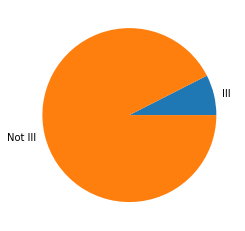

In [ ]:
#All of the ill people
total_ill = graph_data[graph_data["ill"] == "Yes"]["ill"].count()
#print(total_ill)

#All the people in the graph
total_people = graph_data.count()['ill']
#print(total_people)


# Matplot lib always wants data in a list, so we'll make one
pie_data = [total_ill,total_people]
pie_labels = ["Ill", "Not Ill"]
plt.pie(pie_data,labels=pie_labels)

plt.show()

Try questions Q16  - Q17 and type "Completed" in the chat when you're done.

- **Q16** Can you create a pie graph that shows the gender distribution in the data? You just need to modify line 2 & 5

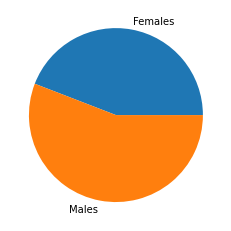

In [ ]:
#Fill in the following
females_ill = graph_data[graph_data["gender"] =="Female"]["ill"].count()

#Fill in the following
males_ill = graph_data[graph_data["gender"] =="Male"]["ill"].count()

pie_data = [females_ill,males_ill]
pie_labels = ["Females","Males"]
plt.pie(pie_data,labels=pie_labels)

plt.show()

- **Q17** Can you create a pie graph that shows the how many people in the dataset make over 100000 annual income? You just need to modify line 2 & 5.

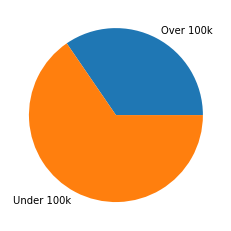

In [ ]:
#Fill in the following
over_100k = graph_data[graph_data["income"] > 100000]["income"].count()

#Fill in the following
under_100k = graph_data[graph_data["income"] <= 100000]["income"].count()

pie_data = [over_100k, under_100k]
pie_labels = ["Over 100k","Under 100k"]
plt.pie(pie_data,labels=pie_labels)

plt.show()

## Automatic Histograms


Say we wanted to plot out the income distribution of our data set as a [historgram](https://en.wikipedia.org/wiki/Histogram) 

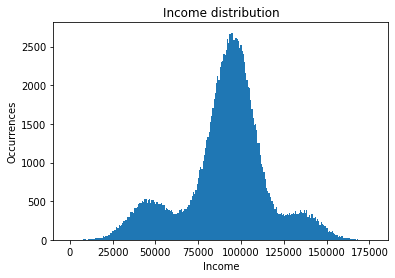

In [ ]:
# bins is the number of containers we'll split our x-axis values into
bins = 250

plt.hist(graph_data["income"],bins)

plt.title("Income distribution")
plt.xlabel("Income")
plt.ylabel("Occurrences")

plt.show()

Try Q18 below and type "All done!" in the chat when you're done

**Q18** Can you draw a histogram of the `age` distribution? Make sure to give it the axes good descriptions. You just need to modify line 1,5, & 6. (The example above should help you) 

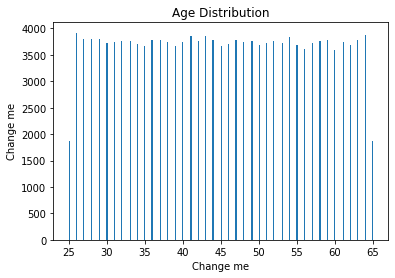

In [ ]:
bins = 250

plt.hist(graph_data["age"],bins) 
plt.title("Age Distribution")
plt.xlabel("Change me") #FILL
plt.ylabel("Change me") #FILL

plt.show()

# Congrats!

You now know a bit about Python Libraries and using advance features of the Language. Try adding new cells to this page and asking yourself more questions


## Further Reading

- Now that we've handled the basics here are some interesting next steps you can persue.

[Python For Librarians](https://libraryjuiceacademy.com/shop/course/270-python-for-librarians/?attribute_pa_session=2021-05-may) - An extended workshop that I'll be offering in the Spring of a similar flavour of what we are tackling.

[Kaggle](https://www.kaggle.com/) - An online portal that teaches data science using Notebooks, also has contests for cash prizes

[Python the Hard Way](https://learntocodetogether.com/learn-python-the-hard-way-free-ebook-download/) - Don't let the name fool you, this book is a great introduction to Python and programming more generally

[Data Analysis with Python and Sci Hub](https://brockdsl.github.io/SciHub_Workshop/) - A tutorial on using Python to analyze Sci-Hub data. Similar to what we saw today, but with real data.

[Google Colab FAQ](https://research.google.com/colaboratory/faq.html) - A concise set of questions and answers on how to use the Google Colab environment.

[Thinking in Pandas](https://www.apress.com/gp/book/9781484258385) - A short book that looks at how to use Pandas for analysis.